In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py
import PIL

In [2]:
#from data.convert_distance_to_depth import * 
import sys  
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/../")

#sys.path.insert(0, '../../data/')

from loaddata import *

In [3]:
test_dataframe = pd.read_csv("../../data/downloads/image_file_test.csv")

In [4]:
test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=None)


In [5]:
test_depth_image_name = test_dataframe["Depth"][0]
test_depth_image = h5py.File(test_depth_image_name, "r")["dataset"][()]

test_color_image_name = test_dataframe["RGB"][0]
test_color_image = h5py.File(test_color_image_name, "r")["dataset"][()] 

test_toned_color_image_name = test_dataframe["ToneMapped"][0]
test_toned_color_image = Image.open(test_toned_color_image_name, "r")

In [6]:
def display_image(data, remapping=None):
    np_data = np.array(data)
    if remapping != None: 
        np_data = remapping(np_data)
    plt.imshow(np_data)
    plt.show()
    

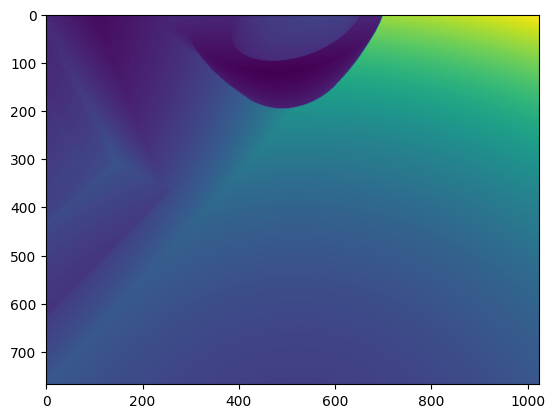

In [11]:
### distance to camera center
display_image(test_depth_image)

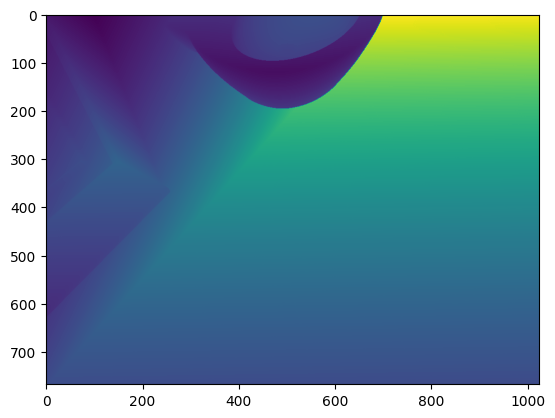

In [12]:
#### planar depth values
from data.convert_distance_to_depth import * 
    
display_image(test_depth_image, convert_distance_to_depth)

In [7]:
def remap_data(np_array,wanted_max=255):
    return (np_array/np_array.max(axis=(0,1))*wanted_max).astype(np.uint8)

In [8]:
print(np.array(test_color_image).min())
print(np.array(test_color_image).max())

test_color_image_remapped = remap_data(test_color_image)

print(test_color_image_remapped.min())
print(test_color_image_remapped.max()) 

0.05353
8.3
1
255


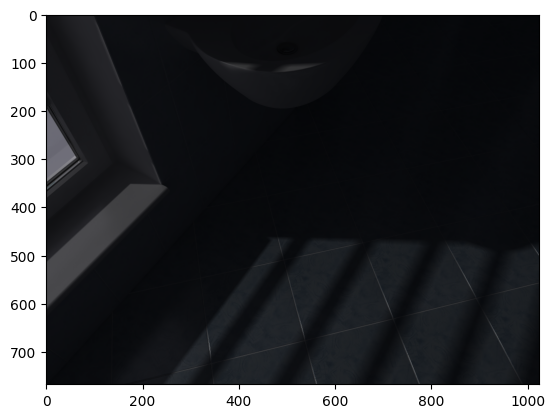

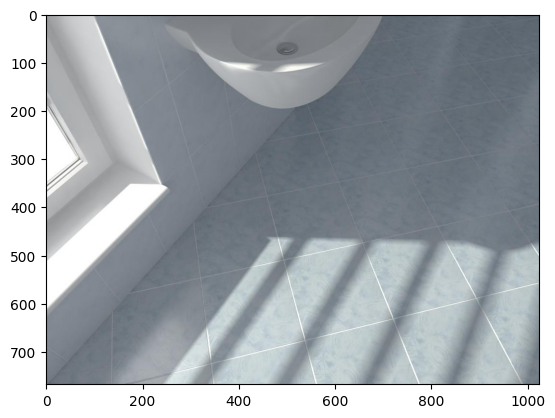

In [9]:
###### compare toned and raw images ########## 
display_image(test_color_image, remap_data)
display_image(test_toned_color_image)

(768, 1024, 3)
(240, 320, 3)


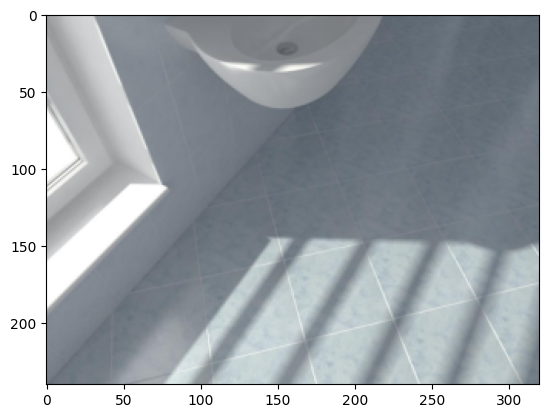

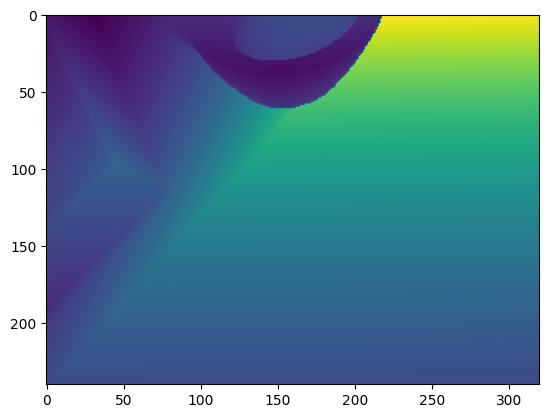

In [10]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=transforms.Compose([
                                           Scale(240)]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


(768, 1024, 3)
(228, 304, 3)


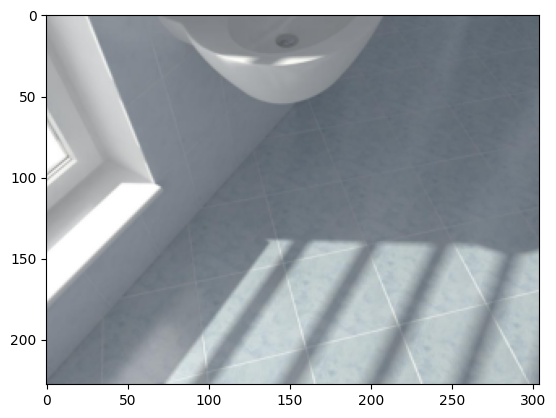

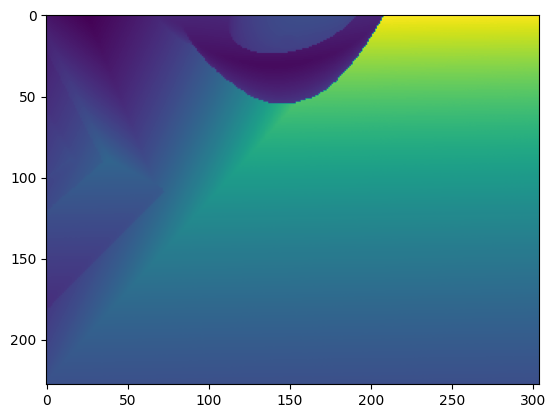

In [11]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228])]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


In [47]:
def display_tensor_data(tensor):
    plt.imshow(tensor.permute(1, 2, 0))
    plt.show()

/Users/alicemazzoleni/Documents/3dVision/3DVision--Infusing-Monocular-Depth-Semantic/model/Revisiting_Single_Depth_Estimation-master/nyu_transform.py:203: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  torch.ByteStorage.from_buffer(pic.tobytes()))
/Users/alicemazzoleni/Documents/3dVision/3DVision--Infusing-Monocular-Depth-Semantic/model/Revisiting_Single_Depth_Estimation-master/nyu_transform.py:200: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered

torch.Size([3, 228, 304])


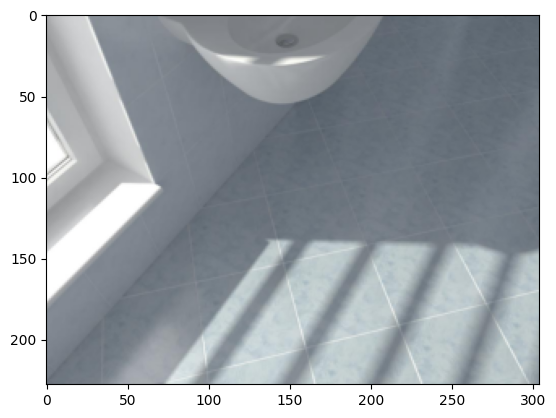

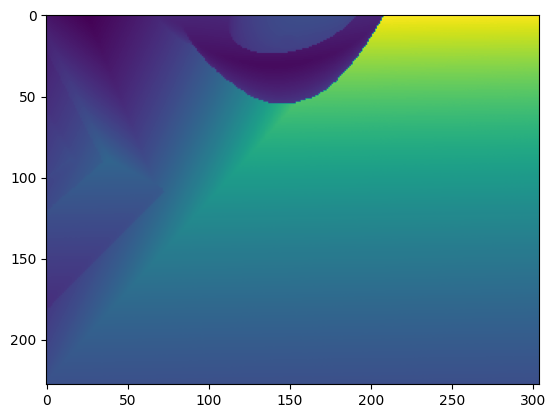

In [13]:
#### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename="../../data/downloads/image_file_test.csv")

test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(0); 

print(test_sample["image"].shape)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [18]:
    def normalize(tensor, mean, std):
        """Normalize a tensor image with mean and standard deviation.
        See ``Normalize`` for more details.
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
            mean (sequence): Sequence of means for R, G, B channels respecitvely.
            std (sequence): Sequence of standard deviations for R, G, B channels
                respecitvely.
        Returns:
            Tensor: Normalized image.
        """

        # TODO: make efficient
        for t, m, s in zip(tensor, mean, std):
            print(t.min())
            print(t.max())
            t.sub_(m).div_(s)
            print(t.min())
            print(t.max())
            
            
        return tensor

/Users/alicemazzoleni/Documents/3dVision/3DVision--Infusing-Monocular-Depth-Semantic/model/Revisiting_Single_Depth_Estimation-master/nyu_transform.py:203: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  torch.ByteStorage.from_buffer(pic.tobytes()))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.5524622  0.58328318 0.60948652]
[0.15974322 0.15640594 0.14400737]
torch.float32
tensor(0.3216)
tensor(1.)
tensor(-1.4454)
tensor(2.8016)
tensor(0.3569)
tensor(1.)
tensor(-1.4476)
tensor(2.6643)
tensor(0.3686)
tensor(1.)
tensor(-1.6725)
tensor(2.7118)
torch.Size([3, 228, 304])


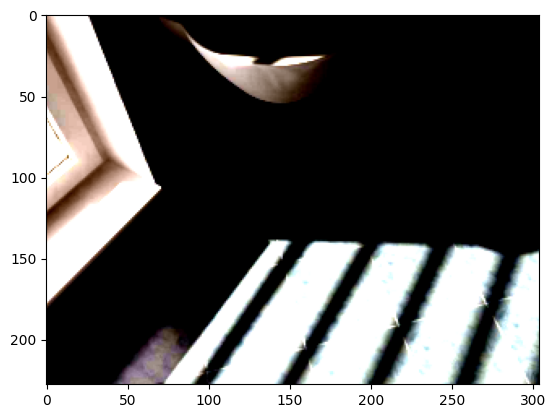

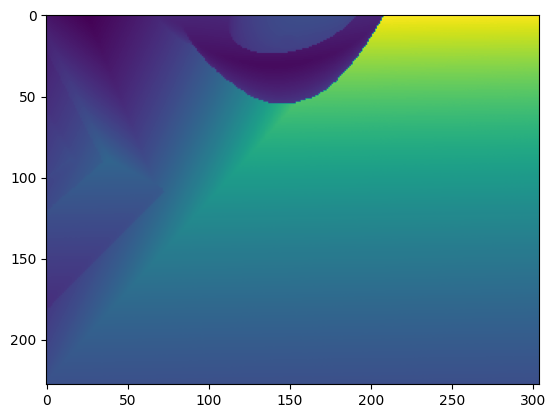

In [19]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename="../../data/downloads/image_file_test.csv")

print(mean)

print(std)

test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(0)

print(test_sample["image"].dtype)

normalized_color_image = normalize(test_sample["image"], mean, std)

print(test_sample["image"].shape)

display_tensor_data(normalized_color_image)

display_tensor_data(test_sample["depth"])

/Users/alicemazzoleni/Documents/3dVision/3DVision--Infusing-Monocular-Depth-Semantic/model/Revisiting_Single_Depth_Estimation-master/nyu_transform.py:203: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  torch.ByteStorage.from_buffer(pic.tobytes()))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.5524622  0.58328318 0.60948652]
[0.15974322 0.15640594 0.14400737]
torch.Size([228, 304])
()
()
torch.Size([228, 304])
()
()
torch.Size([228, 304])
()
()


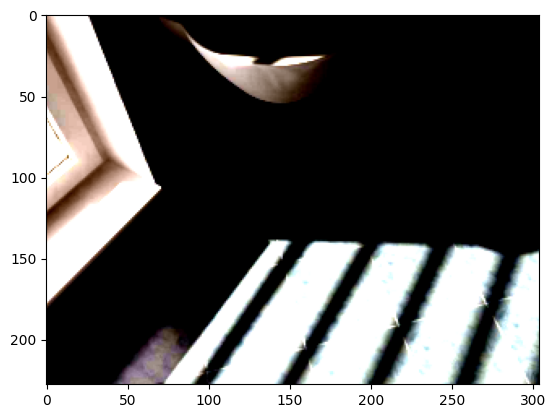

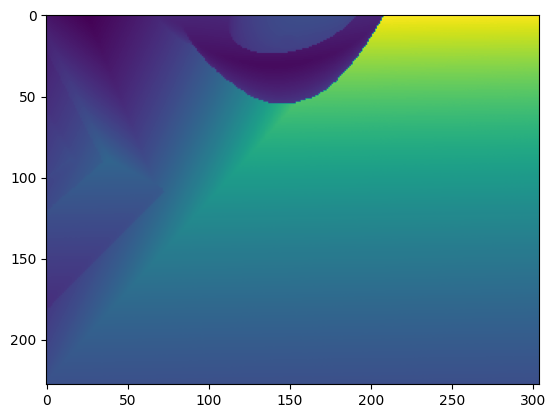

In [31]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename="../../data/downloads/image_file_test.csv")

print(mean)

print(std)

test_dataset = depthDataset(csv_file="../../data/downloads/image_file_test.csv",
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True), Normalize(mean, std)]))

test_sample = test_dataset.__getitem__(0)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [33]:
########## check edge detection ############# 
from test import *

torch.Size([1, 1, 228, 304])


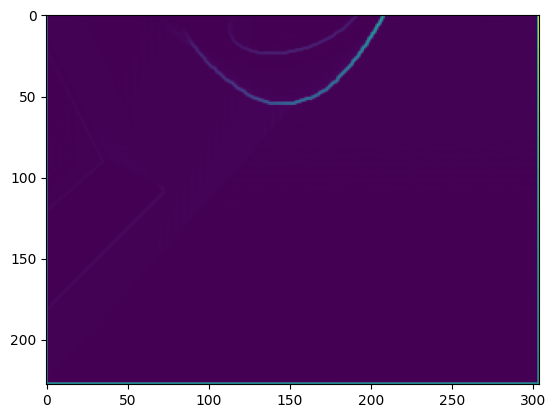

tensor(False)
tensor(False)


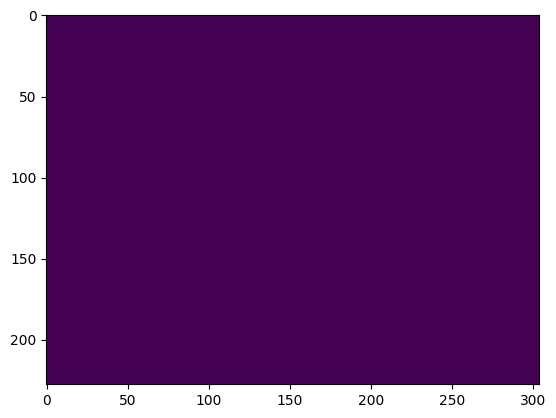

In [30]:
print(test_sample["depth"][None,:].shape) 
depth_edge = edge_detection(test_sample["depth"][None, :]) #additional dimension due to batch 
display_tensor_data(depth_edge)

thre = 0.25
edge_valid = (depth_edge > thre)

print(edge_valid.min())
print(edge_valid.max())

display_tensor_data(edge_valid)

In [34]:
model = define_model(is_resnet=False, is_densenet=False, is_senet=True)
model = torch.nn.DataParallel(model) #.cuda()
model.load_state_dict(torch.load('./pretrained_model/model_senet', map_location=torch.device('cpu')))

<All keys matched successfully>

In [60]:
def test_sample(model, test_loader): 
    model.eval()
    
    for i, sample_batched in enumerate(test_loader):
        image, depth = sample_batched['image'], sample_batched['depth']
        image = torch.autograd.Variable(image, volatile=True)
        depth = torch.autograd.Variable(depth, volatile=True)
        output = model(image)
        output = torch.nn.functional.upsample(output, size=[depth.size(2),depth.size(3)], mode='bilinear')
        display_tensor_data(output[0,:].detach())
        display_tensor_data(depth[0,:])
        #plt.imshow(output[0,:].permute(1, 2, 0).detach().numpy())
        #plt.show()
        
    

/Users/alicemazzoleni/Documents/3dVision/3DVision--Infusing-Monocular-Depth-Semantic/model/Revisiting_Single_Depth_Estimation-master/nyu_transform.py:203: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  torch.ByteStorage.from_buffer(pic.tobytes()))
/var/folders/y3/_mzy7j_s5kl99n8pj0pqwns40000gn/T/ipykernel_68476/3301543032.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = torch.autograd.Variable(image, volatile=True)
/var/folders/y3/_mzy7j_s5kl99n8pj0pqwns40000gn/T/ipykernel_68476/3301543032.py:7: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  depth = torch.autograd.Variable(depth, volatile=True)


torch.Size([228, 304])
()
()
torch.Size([228, 304])
()
()
torch.Size([228, 304])
()
()


/Users/alicemazzoleni/anaconda3/envs/3dVisionProject/lib/python3.9/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 1, 228, 304])
torch.Size([1, 228, 304])
tensor shape in display:  torch.Size([1, 228, 304])


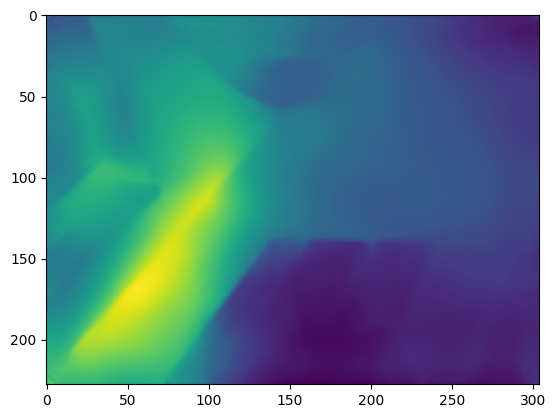

tensor shape in display:  torch.Size([1, 228, 304])


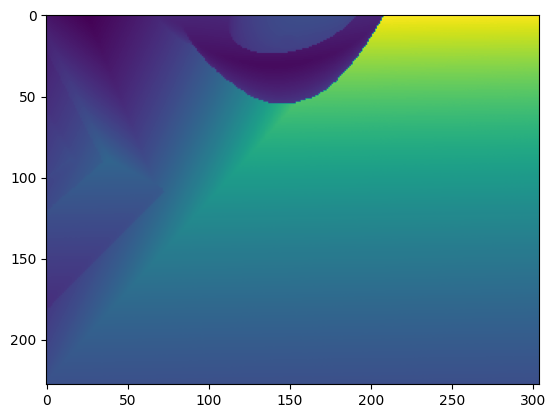

In [61]:
###### network output ########### 
test_loader = loaddata.getTestingData(1, "../../data/downloads/image_file_test.csv")
test_sample(model, test_loader)
